In [1]:
!pip install pillow scikit-learn pandas seaborn -q
!pip install tensorflow -q 

In [2]:
import os
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# add libs to improve accuracy
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [3]:
# Passando a var que contem o folder para treinamento 'folder_path_training'
folder_path_training = "small-dataset-brain-tumor/Training-mini"

filepaths = []
labels = []

folds = os.listdir(folder_path_training)
# print(folds)

for fold in folds:
    foldpath = os.path.join(folder_path_training, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)
train_df

,filepaths,labels
0,small-dataset-brain-tumor/Training-mini/pituit...,pituitary
1,small-dataset-brain-tumor/Training-mini/pituit...,pituitary
2,small-dataset-brain-tumor/Training-mini/pituit...,pituitary
3,small-dataset-brain-tumor/Training-mini/pituit...,pituitary
4,small-dataset-brain-tumor/Training-mini/pituit...,pituitary
...,...,...
395,small-dataset-brain-tumor/Training-mini/mening...,meningioma
396,small-dataset-brain-tumor/Training-mini/mening...,meningioma
397,small-dataset-brain-tumor/Training-mini/mening...,meningioma
398,small-dataset-brain-tumor/Training-mini/mening...,meningioma


In [4]:
# Passando a var que contem o folder para treinamento 'folder_path_training'
folder_path_training = "small-dataset-brain-tumor/Training-mini"

filepaths = []
labels = []

folds = os.listdir(folder_path_training)
# print(folds)

for fold in folds:
    foldpath = os.path.join(folder_path_training, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)


In [5]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 400 validated image filenames belonging to 4 classes.


In [6]:
# Passando a var que contem o folder para teste 'folder_path_testing'
folder_path_testing = "small-dataset-brain-tumor/Testing-mini"

filepaths = []
labels = []

folds = os.listdir(folder_path_testing)
# print(folds)

for fold in folds:
    foldpath = os.path.join(folder_path_testing, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [7]:
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)


In [8]:
batch_size = 16
# img_size = (224, 224)
img_size = (300, 300) # Aumentando para tentar melhorar a performance

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths',
                                        y_col= 'labels',
                                        target_size= img_size,
                                        class_mode= 'categorical',
                                        color_mode= 'rgb',
                                        shuffle= True,
                                        batch_size=batch_size
                                        )


valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode='rgb',
                                       shuffle= True,
                                       batch_size=batch_size
                                       )


test_gen = ts_gen.flow_from_dataframe(test_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= False,
                                      batch_size= batch_size
                                      )

g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator

Found 400 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


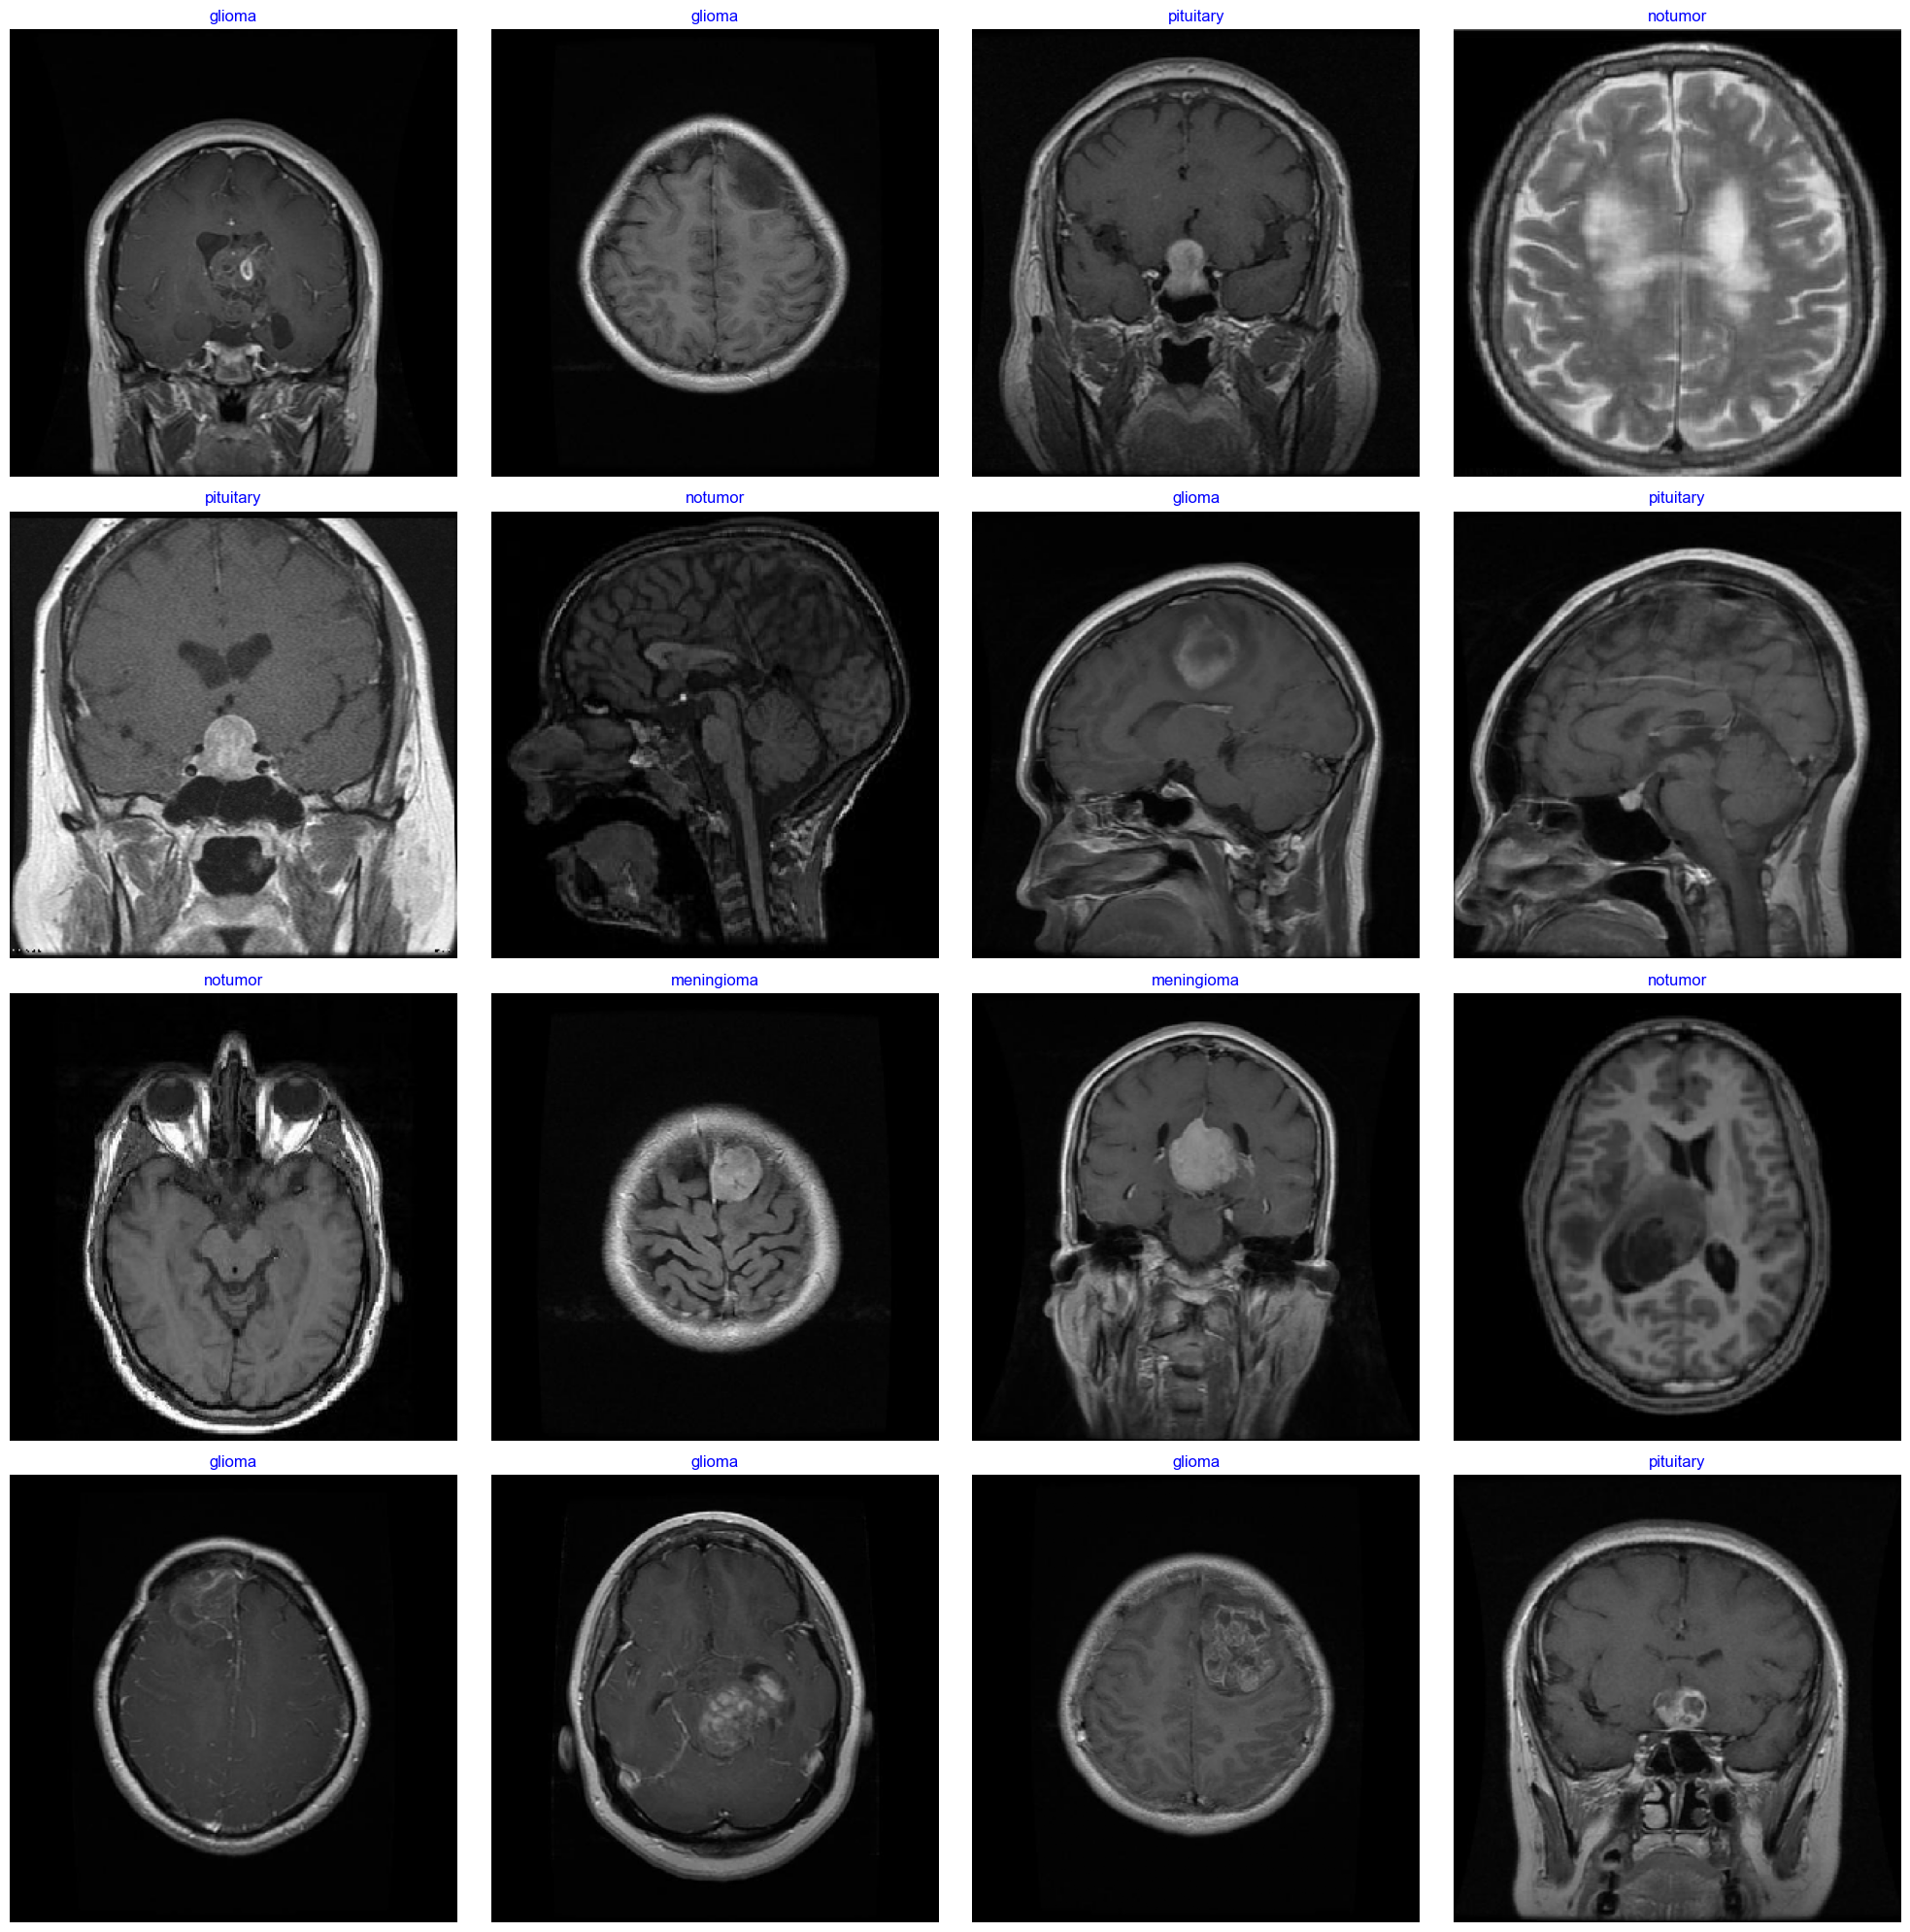

In [9]:
plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
img_size = (224, 224)
channels = 3
img_shape = (224, 224, 3)  
class_count = 4 

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=img_shape)
base_model.trainable = False  # Freeze the base model layers to retain pre-trained features

model = Sequential([
    base_model,  # Adicione o modelo base pré-treinado

    # Adicione camadas convolucionais adicionais, se necessário
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Achate a saída para uma dimensão
    Flatten(),

    # Adicione camadas densas para classificação
    Dense(256, activation="relu", kernel_regularizer="l2"),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),

    Dense(class_count, activation="softmax")  # Camada de saída para classificação
])

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 4)

In [ ]:
epochs = 5   # number of all epochs in training
history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

In [ ]:
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])